 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [366]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [367]:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_csv)

In [368]:
whale_data_nulls = whale_returns_data.isna().sum()
whale_data_nulls

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [369]:
whale_returns_data.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [370]:
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_csv)

In [371]:
algo_returns_nulls = algo_returns_data.isna().sum()
algo_returns_nulls

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [372]:
algo_returns_data.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [373]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_data = pd.read_csv(sp500_history_csv)
sp500_history_data

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [374]:
sp500_history_data.dtypes

Date     object
Close    object
dtype: object

In [375]:
sp500_history_data["Date"] = sp500_history_data["Date"].astype("datetime64")
sp500_history_data["Close"] = sp500_history_data["Close"].str.replace('$', '')
sp500_history_data["Close"] = sp500_history_data["Close"].astype("float")
sp500_history_data

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
...,...,...
1644,2012-10-05,1460.93
1645,2012-10-04,1461.40
1646,2012-10-03,1450.99
1647,2012-10-02,1445.75


In [376]:
sp500_history_data.set_index(pd.to_datetime(sp500_history_data['Date'], infer_datetime_format=True), inplace=True)
sp500_history_data.drop(columns=['Date'], inplace=True)
sp500_history_data["SP500 Daily Return"] = sp500_history_data.pct_change()
sp500_history_data

,Close,SP500 Daily Return
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


In [377]:
sp500_history_data.dropna()

,Close,SP500 Daily Return
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [378]:
whale_returns_data.set_index(pd.to_datetime(whale_returns_data['Date'], infer_datetime_format=True), inplace=True)
whale_returns_data.drop(columns=['Date'], inplace=True)
algo_returns_data.set_index(pd.to_datetime(algo_returns_data['Date'], infer_datetime_format=True), inplace=True)
algo_returns_data.drop(columns=['Date'], inplace=True)

In [379]:
joined_returns_data = pd.concat([whale_returns_data, algo_returns_data, sp500_history_data], axis="columns", join="inner")
joined_returns_data.isna().sum()
joined_returns_data = joined_returns_data.dropna()
joined_returns_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,SP500 Daily Return
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.017254
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,2905.58,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

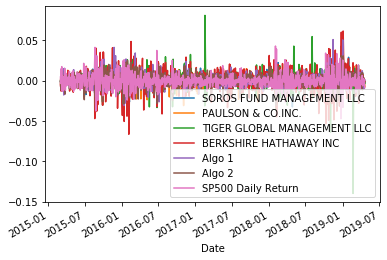

In [380]:
close_data = joined_returns_data["Close"]
joined_returns_data.drop(columns=["Close"], inplace=True)
joined_returns_data.plot()

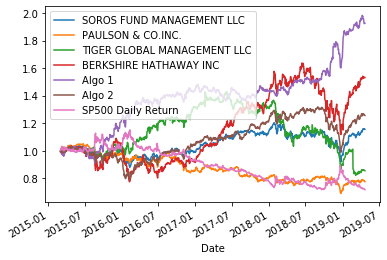

In [381]:
cumulative_returns_data = (1 + joined_returns_data).cumprod()
cumulative_returns_data.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

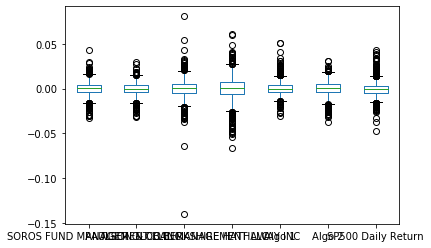

In [382]:
# Box plot to visually show risk
joined_returns_data.plot.box()

In [383]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = joined_returns_data.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500 Daily Return             0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

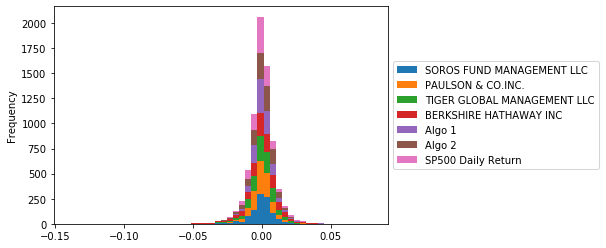

In [384]:
# Determine which portfolios are riskier than the S&P 500
joined_returns_data.plot.hist(stacked=True, bins=50).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [385]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500 Daily Return             0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

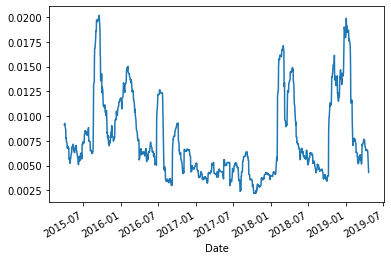

In [386]:
#Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_std = joined_returns_data["SP500 Daily Return"].rolling(21).std()
sp500_std.plot()

In [387]:
# Correlation
joined_returns_data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500 Daily Return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [388]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
sp500_bh_betas = joined_returns_data[["SP500 Daily Return", "BERKSHIRE HATHAWAY INC"]]
sp500_bh_betas

,SP500 Daily Return,BERKSHIRE HATHAWAY INC
Date,,
2015-03-03,0.004408,-0.006569
2015-03-04,-0.001195,0.004213
2015-03-05,0.014378,0.006726
2015-03-06,-0.003929,-0.013098
2015-03-09,0.017254,-0.001652
...,...,...
2019-04-15,-0.000509,-0.010492
2019-04-16,0.002279,0.000837
2019-04-17,-0.001577,0.003222


In [389]:
rolling_covariance = sp500_bh_betas['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(sp500_bh_betas['SP500 Daily Return'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000008
2019-04-16    0.000006
2019-04-17    0.000006
2019-04-18    0.000009
2019-04-22    0.000006
Length: 1042, dtype: float64

In [390]:
rolling_variance = sp500_bh_betas['SP500 Daily Return'].rolling(window=30).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000043
2019-04-16    0.000041
2019-04-17    0.000038
2019-04-18    0.000037
2019-04-22    0.000034
Name: SP500 Daily Return, Length: 1042, dtype: float64

In [391]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.181595
2019-04-16    0.144790
2019-04-17    0.162776
2019-04-18    0.243490
2019-04-22    0.188760
Length: 1042, dtype: float64

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [392]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [393]:
# Annualzied Sharpe Ratios
sharpe_ratios = (joined_returns_data.mean() * 252) / (joined_returns_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500 Daily Return            -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

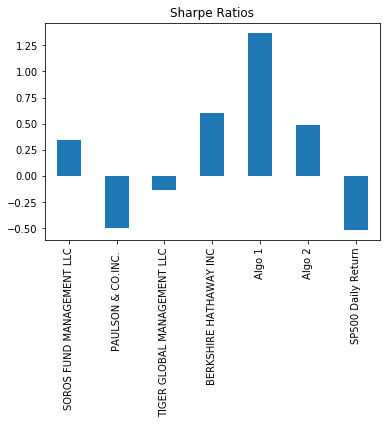

In [394]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
# Only algo 1 outperforms all whales, but algos both outperform the market. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [395]:
# Read the first stock
amzn_returns_csv = Path("Resources/amzn_return.csv")
amzn_returns_data = pd.read_csv(amzn_returns_csv)
amzn_returns_data

,Date,Close
0,5/28/14,310.16
1,5/29/14,313.78
2,5/30/14,312.55
3,6/2/14,308.84
4,6/3/14,307.19
...,...,...
1234,4/23/19,1923.77
1235,4/24/19,1901.75
1236,4/25/19,1902.25
1237,4/26/19,1950.63


In [396]:
amzn_returns_data.set_index(pd.to_datetime(amzn_returns_data['Date'], infer_datetime_format=True), inplace=True)
amzn_returns_data.drop(columns=['Date'], inplace=True)
amzn_returns_data["AMZN Daily Return"] = amzn_returns_data.pct_change()

In [397]:
amzn_returns_data.isna().sum()
amzn_returns_data = amzn_returns_data.dropna()
amzn_returns_data

,Close,AMZN Daily Return
Date,,
2014-05-29,313.78,0.011671
2014-05-30,312.55,-0.003920
2014-06-02,308.84,-0.011870
2014-06-03,307.19,-0.005343
2014-06-04,306.78,-0.001335
...,...,...
2019-04-23,1923.77,0.019319
2019-04-24,1901.75,-0.011446
2019-04-25,1902.25,0.000263


In [398]:
# Read the second stock
wmt_returns_csv = Path("Resources/wmt_returns.csv")
wmt_returns_data = pd.read_csv(wmt_returns_csv)
wmt_returns_data

,Date,Close
0,5/28/14,75.53
1,5/29/14,75.98
2,5/30/14,76.77
3,6/2/14,76.76
4,6/3/14,76.71
...,...,...
1234,4/23/19,103.07
1235,4/24/19,103.53
1236,4/25/19,103.52
1237,4/26/19,101.53


In [399]:
wmt_returns_data.set_index(pd.to_datetime(wmt_returns_data['Date'], infer_datetime_format=True), inplace=True)
wmt_returns_data.drop(columns=['Date'], inplace=True)
wmt_returns_data["WMT Daily Return"] = wmt_returns_data.pct_change()
wmt_returns_data

,Close,WMT Daily Return
Date,,
2014-05-28,75.53,NaN
2014-05-29,75.98,0.005958
2014-05-30,76.77,0.010397
2014-06-02,76.76,-0.000130
2014-06-03,76.71,-0.000651
...,...,...
2019-04-23,103.07,0.006838
2019-04-24,103.53,0.004463
2019-04-25,103.52,-0.000097


In [400]:
wmt_returns_data.isna().sum()
wmt_returns_data = wmt_returns_data.dropna()
wmt_returns_data

,Close,WMT Daily Return
Date,,
2014-05-29,75.98,0.005958
2014-05-30,76.77,0.010397
2014-06-02,76.76,-0.000130
2014-06-03,76.71,-0.000651
2014-06-04,77.13,0.005475
...,...,...
2019-04-23,103.07,0.006838
2019-04-24,103.53,0.004463
2019-04-25,103.52,-0.000097


In [401]:
# Read the third stock
googl_returns_csv = Path("Resources/googl_returns.csv")
googl_returns_data = pd.read_csv(googl_returns_csv)
googl_returns_data

,Date,Close
0,5/28/14,570.45
1,5/29/14,570.56
2,5/30/14,571.65
3,6/2/14,564.34
4,6/3/14,554.51
...,...,...
1234,4/23/19,1270.59
1235,4/24/19,1260.05
1236,4/25/19,1267.34
1237,4/26/19,1277.42


In [402]:
googl_returns_data.set_index(pd.to_datetime(googl_returns_data['Date'], infer_datetime_format=True), inplace=True)
googl_returns_data.drop(columns=['Date'], inplace=True)
googl_returns_data["GOOGL Daily Return"] = googl_returns_data.pct_change()

In [403]:
googl_returns_data.isna().sum()
googl_returns_data = googl_returns_data.dropna()
googl_returns_data

,Close,GOOGL Daily Return
Date,,
2014-05-29,570.56,0.000193
2014-05-30,571.65,0.001910
2014-06-02,564.34,-0.012788
2014-06-03,554.51,-0.017419
2014-06-04,553.76,-0.001353
...,...,...
2019-04-23,1270.59,0.013424
2019-04-24,1260.05,-0.008295
2019-04-25,1267.34,0.005785


In [404]:
# Concatenate all stocks into a single DataFrame
new_joined_returns_data = pd.concat([amzn_returns_data, wmt_returns_data, googl_returns_data], axis="columns", join="inner")
new_joined_returns_data.drop(columns=["Close"], inplace=True)
new_joined_returns_data

,AMZN Daily Return,WMT Daily Return,GOOGL Daily Return
Date,,,
2014-05-29,0.011671,0.005958,0.000193
2014-05-30,-0.003920,0.010397,0.001910
2014-06-02,-0.011870,-0.000130,-0.012788
2014-06-03,-0.005343,-0.000651,-0.017419
2014-06-04,-0.001335,0.005475,-0.001353
...,...,...,...
2019-04-23,0.019319,0.006838,0.013424
2019-04-24,-0.011446,0.004463,-0.008295
2019-04-25,0.000263,-0.000097,0.005785


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [405]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
new_weighted_returns_data = new_joined_returns_data.dot(weights)
new_weighted_returns_data

Date
2014-05-29    0.005941
2014-05-30    0.002796
2014-06-02   -0.008263
2014-06-03   -0.007804
2014-06-04    0.000929
                ...   
2019-04-23    0.013193
2019-04-24   -0.005093
2019-04-25    0.001984
2019-04-26    0.004721
2019-04-29    0.002914
Length: 1238, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [406]:
all_joined_returns_data = pd.concat([new_joined_returns_data, joined_returns_data], axis="columns", join="inner")
all_joined_returns_data

,AMZN Daily Return,WMT Daily Return,GOOGL Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return
Date,,,,,,,,,,
2015-03-03,-0.002723,-0.007027,0.006556,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,-0.004914,-0.009476,-0.000795,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.013352,0.011988,0.005360,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.019957,-0.011727,-0.014671,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,-0.004025,0.003511,0.002095,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,0.000982,0.008566,0.003108,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.009849,0.004881,0.004386,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.000955,0.002235,0.006681,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [414]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_joined_returns_data.isna().sum()

AMZN Daily Return              0
WMT Daily Return               0
GOOGL Daily Return             0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 Daily Return             0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

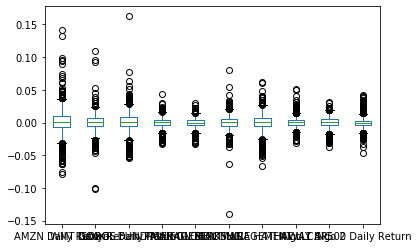

In [415]:
# Risk
all_joined_returns_data.plot.box()

In [416]:
all_daily_std = all_joined_returns_data.std()
all_daily_std = all_daily_std.sort_values(ascending=False)
all_daily_std

AMZN Daily Return              0.018843
GOOGL Daily Return             0.014877
BERKSHIRE HATHAWAY INC         0.012919
WMT Daily Return               0.012785
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500 Daily Return             0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

AMZN Daily Return              0.299126
GOOGL Daily Return             0.236164
BERKSHIRE HATHAWAY INC         0.205079
WMT Daily Return               0.202952
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500 Daily Return             0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

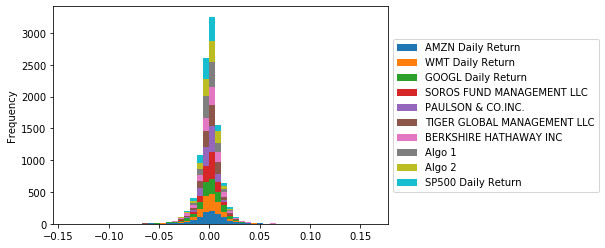

In [417]:
all_joined_returns_data.plot.hist(stacked=True, bins=50).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
all_annualized_std = all_daily_std * np.sqrt(252)
all_annualized_std

In [428]:
# Rolling
new_sp500_std = all_joined_returns_data["SP500 Daily Return"].rolling(21).std()
new_sp500_std.plot()
all_rolling_covariance = all_betas["AMZN Daily Return", "WMT Daily Return", "GOOGL Daily Return", "SOROS FUND MANAGEMENT LLC", "TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1", "Algo 2"].rolling(window=30).cov(sp500_bh_betas['SP500 Daily Return'])
all_rolling_covariance

In [430]:
# Beta
all_betas = all_joined_returns_data[["SP500 Daily Return", "AMZN Daily Return", "WMT Daily Return", "GOOGL Daily Return", "SOROS FUND MANAGEMENT LLC", "TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1", "Algo 2"]]
all_betas

,SP500 Daily Return,AMZN Daily Return,WMT Daily Return,GOOGL Daily Return,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,,
2015-03-03,0.004408,-0.002723,-0.007027,0.006556,-0.001266,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.001195,-0.004914,-0.009476,-0.000795,0.002230,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.014378,0.013352,0.011988,0.005360,0.004016,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003929,-0.019957,-0.011727,-0.014671,-0.007905,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.017254,-0.004025,0.003511,0.002095,0.000582,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.000509,0.000982,0.008566,0.003108,-0.001422,0.000398,-0.010492,-0.004331,-0.004572
2019-04-16,0.002279,0.009849,0.004881,0.004386,0.002699,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.001577,0.000955,0.002235,0.006681,-0.002897,-0.004409,0.003222,-0.010301,-0.005228


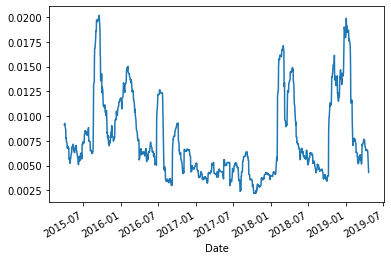

In [431]:
# Rolling
new_sp500_std = all_joined_returns_data["SP500 Daily Return"].rolling(21).std()
new_sp500_std.plot()

In [434]:
all_rolling_covariance = all_betas[["AMZN Daily Return", "WMT Daily Return", "GOOGL Daily Return", "SOROS FUND MANAGEMENT LLC", "TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1", "Algo 2"]].rolling(window=30).cov(sp500_bh_betas['SP500 Daily Return'])
all_rolling_covariance

,AMZN Daily Return,WMT Daily Return,GOOGL Daily Return,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,-0.000004,0.000008,-0.000002,0.000008,0.000011,0.000008,-1.403448e-06,-0.000004
2019-04-16,-0.000002,0.000007,-0.000005,0.000009,0.000012,0.000006,-3.323254e-06,-0.000003
2019-04-17,0.000004,0.000008,-0.000003,0.000012,0.000015,0.000006,-2.605366e-06,0.000003


In [435]:
rolling_variance = all_betas['SP500 Daily Return'].rolling(window=30).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000043
2019-04-16    0.000041
2019-04-17    0.000038
2019-04-18    0.000037
2019-04-22    0.000034
Name: SP500 Daily Return, Length: 1042, dtype: float64

In [436]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.181595
2019-04-16    0.144790
2019-04-17    0.162776
2019-04-18    0.243490
2019-04-22    0.188760
Length: 1042, dtype: float64

In [425]:
# Annualzied Sharpe Ratios
all_sharpe_ratios = (all_joined_returns_data.mean() * 252) / (all_joined_returns_data.std() * np.sqrt(252))
all_sharpe_ratios

AMZN Daily Return              1.432782
WMT Daily Return               0.337567
GOOGL Daily Return             0.915325
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500 Daily Return            -0.518582
dtype: float64

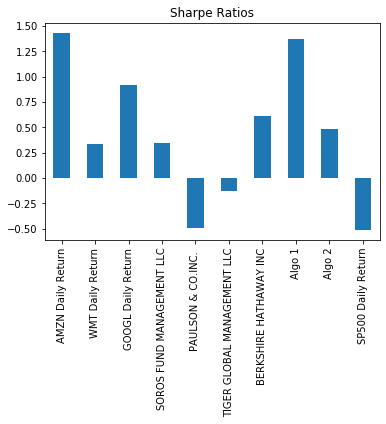

In [426]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [427]:
all_joined_returns_data.corr()

,AMZN Daily Return,WMT Daily Return,GOOGL Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return
AMZN Daily Return,1.000000,0.198758,0.656006,0.540076,0.403487,0.354411,0.618349,0.235621,0.502872,0.023012
WMT Daily Return,0.198758,1.000000,0.218713,0.318750,0.226853,0.369212,0.240812,0.078906,0.309313,0.048037
GOOGL Daily Return,0.656006,0.218713,1.000000,0.561204,0.425603,0.411376,0.647029,0.198818,0.527174,-0.047434
SOROS FUND MANAGEMENT LLC,0.540076,0.318750,0.561204,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.403487,0.226853,0.425603,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.354411,0.369212,0.411376,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.618349,0.240812,0.647029,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.235621,0.078906,0.198818,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.502872,0.309313,0.527174,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500 Daily Return,0.023012,0.048037,-0.047434,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000
